# Projekt realizowany w ramach przedmiotu Metody Eksploracji Danych, Temat: Analiza Zbioru Danych Aplikacji Z Google Play Store Wraz Ze Stworzeniem Modelu Regresji Oceny i Ceny. 
## Autorzy: Marharyta Kruk, Bartosz Puszkarski

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Wstępna analiza danych

In [2]:
df = pd.read_csv("./dane/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Z wartości ciągłych mamy Rating, Reviews, Size oraz Price. 

In [3]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Ile pustych elementów

In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Wniosek: W danym zbiorze danych są dość dużo rekordów bez oceny, oraz są kilka zniszczonych wyrazów. Dalej udało się znaleźć kilka anomalij w danych, które udało się wyeliminować. 

# Analiza cen

## Aplikacje dzielą się na płatne i bezpłatne. Czy cena ma wpływ na wynikową ocenę? 

In [6]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [7]:
def price_to_number(price):
    if price in ["0", "Everyone"]:
        return 0
    return float(price[1:])

price_number = df.copy()
price_number["Price"] = df["Price"].apply(price_to_number)
print(sorted(price_number["Price"].unique()))


[0.0, 0.99, 1.0, 1.04, 1.2, 1.26, 1.29, 1.49, 1.5, 1.59, 1.61, 1.7, 1.75, 1.76, 1.96, 1.97, 1.99, 2.0, 2.49, 2.5, 2.56, 2.59, 2.6, 2.9, 2.95, 2.99, 3.02, 3.04, 3.08, 3.28, 3.49, 3.61, 3.88, 3.9, 3.95, 3.99, 4.29, 4.49, 4.59, 4.6, 4.77, 4.8, 4.84, 4.85, 4.99, 5.0, 5.49, 5.99, 6.49, 6.99, 7.49, 7.99, 8.49, 8.99, 9.0, 9.99, 10.0, 10.99, 11.99, 12.99, 13.99, 14.0, 14.99, 15.46, 15.99, 16.99, 17.99, 18.99, 19.4, 19.9, 19.99, 24.99, 25.99, 28.99, 29.99, 30.99, 33.99, 37.99, 39.99, 46.99, 74.99, 79.99, 89.99, 109.99, 154.99, 200.0, 299.99, 379.99, 389.99, 394.99, 399.99, 400.0]


## Sprawdzamy płatne aplikacje

In [8]:
grouped_price = price_number[price_number['Type']=='Paid']

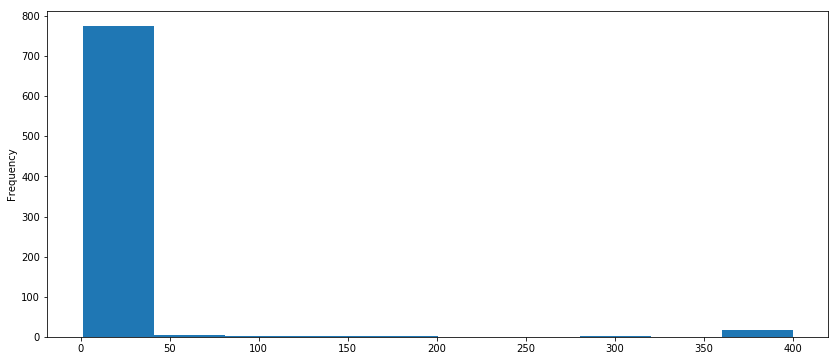

In [9]:
plt.figure(figsize=(14, 6))
grouped_price['Price'].plot.hist()

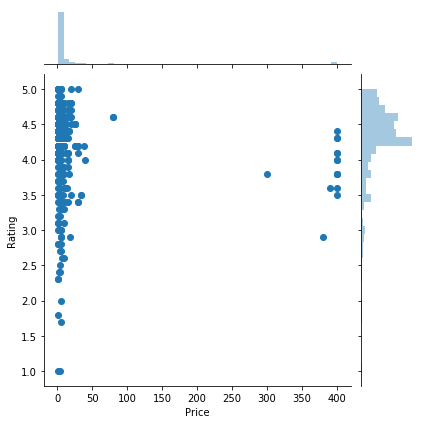

In [10]:
g = sns.jointplot(x="Price", y="Rating", data=grouped_price)

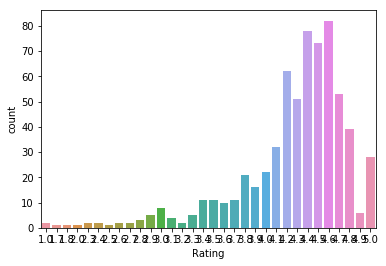

In [11]:
g = sns.countplot(x="Rating",  data=grouped_price)

### Wniosek: Cena większości aplikacji znajduje się w przedziałe 1..30 . Rating tych aplikacji nie bardzo zależy od ceny, lecz drogie aplikacje (300-400) mają średnie wysoką ocenę.   

### Najdroższe aplikacje:

In [12]:
most_expansive = grouped_price[grouped_price['Price']>150]
most_expansive

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100+,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,"10,000+",Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,"10,000+",Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,"100,000+",Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,"10,000+",Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2.6M,"10,000+",Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,"50,000+",Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,"1,000+",Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22M,"1,000+",Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965k,"5,000+",Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


<Figure size 1080x720 with 0 Axes>

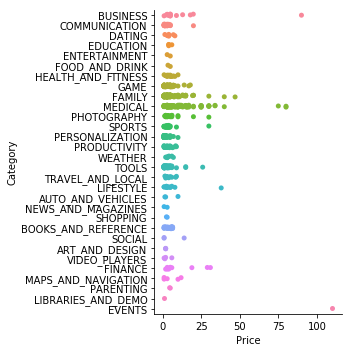

In [13]:
plt.figure(figsize=(15, 10))
grouped_price = grouped_price[grouped_price['Price']<150]
g = sns.catplot(x="Price", y="Category", data=grouped_price)

### Wniosek: najdroższe aplikacje są w kategoriach Lifestyle, Finance, Medical, Family, są kilka wyjątków w Events, Business. Reszta jest mniej od 30.  Ogólnie w różnych kategoriach są wartości odstające, kilka aplikacji są droższe. 

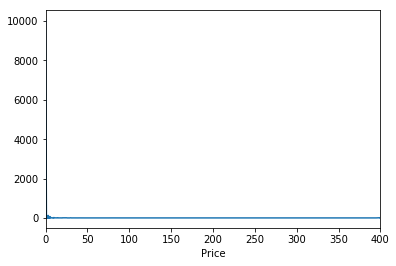

In [14]:
grouped_price = price_number.groupby("Price").count()
grouped_price["App"].index
grouped_price["App"].plot()


#### Jak widać nie ma za wiele drogich aplikacji

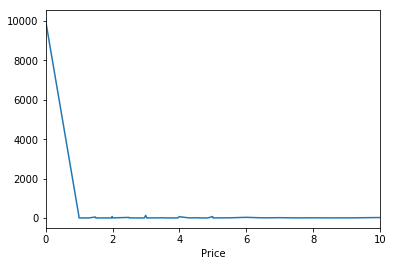

In [15]:
grouped_price.drop([10.99, 11.99, 12.99, 13.99, 14.0, 14.99, 15.46, 15.99, 16.99, 17.99, 18.99, 19.4, 19.9, 19.99, 24.99, 25.99, 28.99, 29.99, 30.99, 33.99, 37.99, 39.99, 46.99, 74.99, 79.99, 89.99, 109.99, 154.99, 200.0, 299.99, 379.99, 389.99, 394.99, 399.99, 400.0])["App"].plot()

In [16]:
total = grouped_price["App"].sum()
less_than_one_and_a_half = grouped_price["App"].loc[0:1.5].sum()
print("Aplikacje o cenie < 1.5 $ stanowią", less_than_one_and_a_half / total, "% całości")

Aplikacje o cenie < 1.5 $ stanowią 0.9448390369892077 % całości


### Wniosek: aplikacje o cenie < 1.5 stanowią wiekszość wszystkich płatnych aplikacji. 

### Jaki jest rozkład ocen dla aplikacji bezpłatnych? 

In [17]:
grouped_price = price_number[price_number['Type']=='Free']

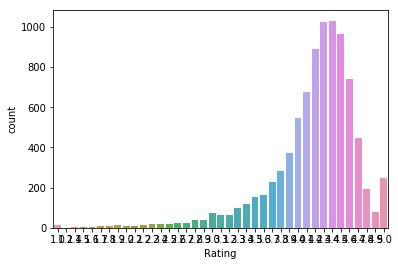

In [18]:
g = sns.countplot(x="Rating",  data=grouped_price)

### Wnioski: typ aplikacji ma mały wpływ na wynikową ocenę. Cena też ma mały wpływ, jednak że bardzo drogie apliakcje (>300) mają średnio wysoką ocenę. 

# Analiza Rating

### Wstępna analiza ratingu

In [19]:
df["Rating"].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

#### W tej kolumnie są dużo wartości pustych. 

In [20]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

#### Wyrzucamy anomalię

In [21]:
anomaly = df["Rating"] == 19.0
df[anomaly]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [22]:
i = df[df['Category'] == '1.9'].index
df.loc[i]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [23]:
df = df.drop(i)

In [24]:
df.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [25]:
df["Rating"].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

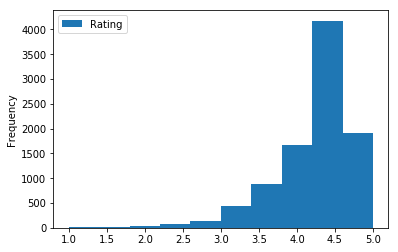

In [26]:
df.plot.hist(by="Rating")

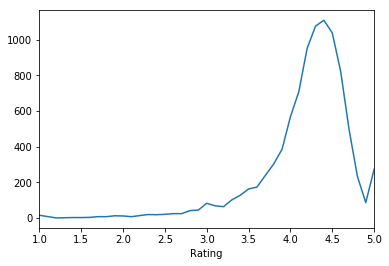

In [27]:
counted_ratings = df.groupby("Rating").count()["App"]
counted_ratings.plot()

In [28]:
wrongs = 0
for i in df["Rating"].unique():
    try: 
        int(i)
    except ValueError:
        wrongs += 1
        print("Wartość nie jest liczbą: ", i)
        
print("Kolumna zawiera: ", wrongs, " wartości, które nie są liczbami.")

Wartość nie jest liczbą:  nan
Kolumna zawiera:  1  wartości, które nie są liczbami.


### Wniosek: większość aplikacji jest dobrze oceniana (w ramach 4.0-4.5)

# Analiza Reviews

In [29]:
wrongs = 0
for i in df["Reviews"].unique():
    try: 
        int(i)
    except ValueError:
        wrongs += 1
        print("Wartość nie jest liczbą: ", i)
        
print("Kolumna zawiera: ", wrongs, " wartości, które nie są liczbami.")

Kolumna zawiera:  0  wartości, które nie są liczbami.


In [30]:
df['Reviews'] = df['Reviews'].apply(lambda x : int(x))

In [31]:
df['Reviews'].describe()

count    1.084000e+04
mean     4.441529e+05
std      2.927761e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.477550e+04
max      7.815831e+07
Name: Reviews, dtype: float64

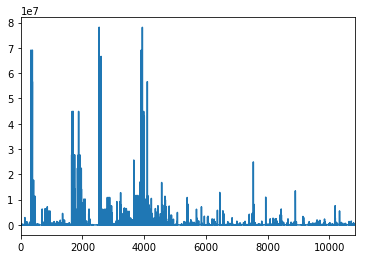

In [32]:
df['Reviews'].plot()

#### Najmniejsza wartość: 0, Największa: 78.158.310

# Installs

### Wstępna analiza: jakie wartości mamy

In [33]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

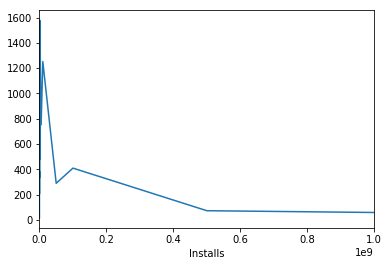

In [34]:
def installs_to_int(install):
    if install in ["0", "0+", "Free"]:
        return 0
    install = install.replace(",", "")[:-1]
    return int(install)


with_installs_as_integers = df.copy()
with_installs_as_integers["Installs"] = df["Installs"].apply(installs_to_int)

counted = with_installs_as_integers.groupby("Installs").count()
counted["App"].plot()

In [35]:
with_installs_as_integers.describe()

,Rating,Reviews,Installs
count,9366.000000,1.084000e+04,1.084000e+04
mean,4.191757,4.441529e+05,1.546434e+07
std,0.515219,2.927761e+06,8.502936e+07
min,1.000000,0.000000e+00,0.000000e+00
25%,4.000000,3.800000e+01,1.000000e+03
50%,4.300000,2.094000e+03,1.000000e+05
75%,4.500000,5.477550e+04,5.000000e+06
max,5.000000,7.815831e+07,1.000000e+09


Obcięcie skrajnie największych wartości


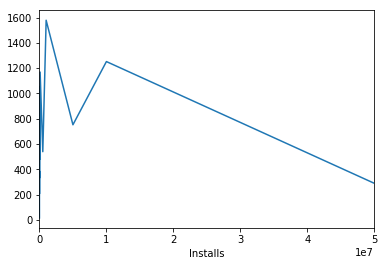

In [36]:
print("Obcięcie skrajnie największych wartości")
counted["App"][:-3].plot()


### Jakie aplikacje instalują się więcej? 

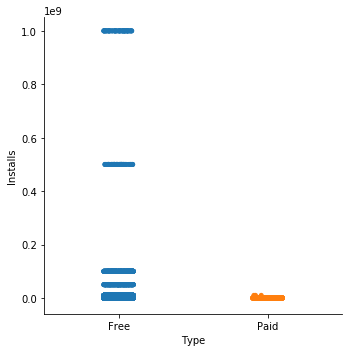

In [37]:
g = sns.catplot(x = 'Type', y = 'Installs', data=with_installs_as_integers)

### Wniosek: Płatne aplikacje instalują znacznie rzadziej niż bezpłatne.

### Jak są związane oceny oraz ilość instalacji? 

In [38]:
sns.set(rc={'figure.figsize':(18.7,8.27)})

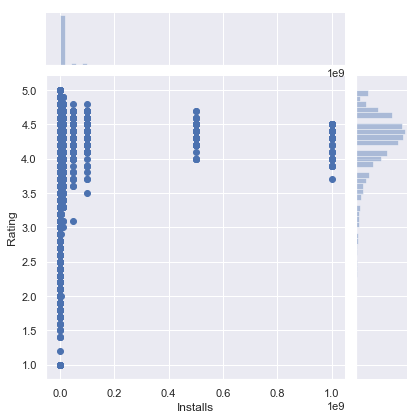

In [39]:
g = sns.jointplot(y='Rating', x='Installs', data=with_installs_as_integers)

In [40]:
with_installs_as_integers2 = with_installs_as_integers[with_installs_as_integers['Installs'] < 50000000]

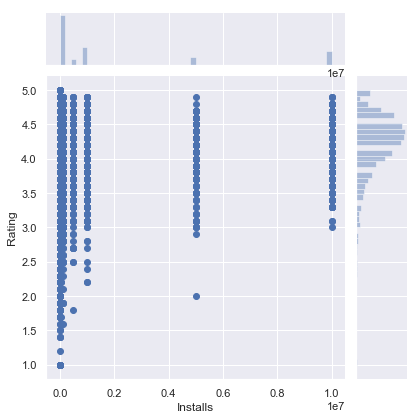

In [41]:
g = sns.jointplot(y='Rating', x='Installs', data=with_installs_as_integers2)

### Wniosek: Mała liczba instalacji nie ma wpływu na ocenę, jednak duża liczba (od 5mln) oznacza dość wysoką ocenę. 

## Wersji

### Analiza wstępna (jakie wartości, jaki rozkład)

In [42]:
df["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

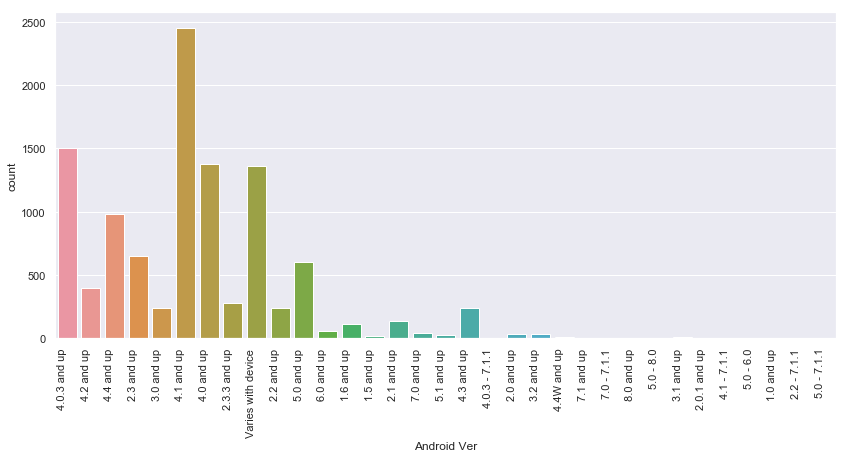

In [43]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x='Android Ver', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

### Aplikacje dla których wersji androida mają największe oceny? 

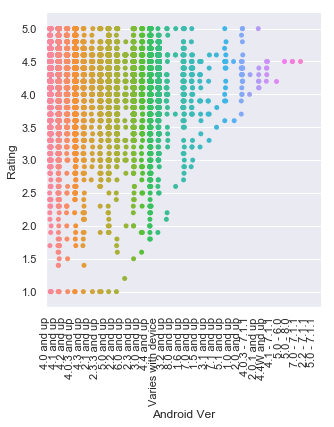

In [44]:
categories_sorted = df.sort_values(by='Rating')
categories_sorted.reset_index(inplace=True)
g = sns.catplot(x='Android Ver', y='Rating', data=categories_sorted)
g.set_xticklabels(rotation=90, ha="right")
g

### Jak widać z wykresu, są kilka wersji andorida, dla których charakterystyczne są wysokie oceny.

## Rating kontentu

### Analiza wstepna

In [45]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

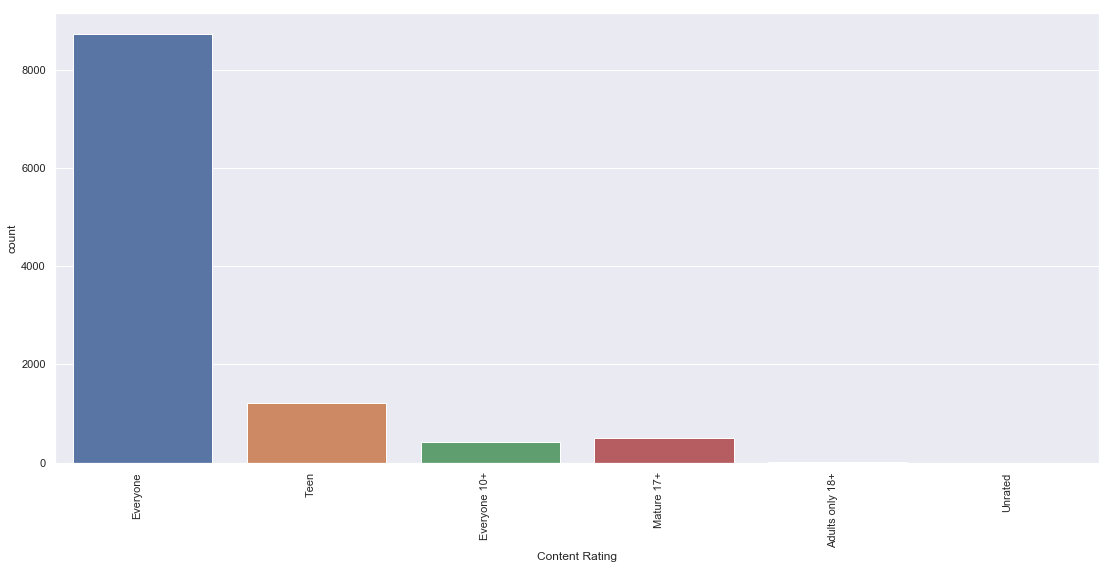

In [46]:
g = sns.countplot(x='Content Rating', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

### Który Rating które aplikacje mają

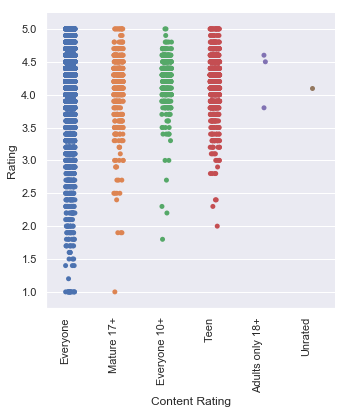

In [47]:
categories_sorted = df.sort_values(by='Rating')
categories_sorted.reset_index(inplace=True)
g = sns.catplot(x='Content Rating', y='Rating', data=categories_sorted)
g.set_xticklabels(rotation=90, ha="right")
g

In [48]:
df[df['Content Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7312,Best CG Photography,FAMILY,NaN,1,2.5M,500+,Free,0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up
8266,DC Universe Online Map,TOOLS,4.1,1186,6.4M,"50,000+",Free,0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


### Aplikacje typu "Adults only" są wysoko oceniane. Najniższe oceny są tylko w aplikacjach typu "Everyone" i "Mature 17+". 

## Rodzaje aplikacji

In [49]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

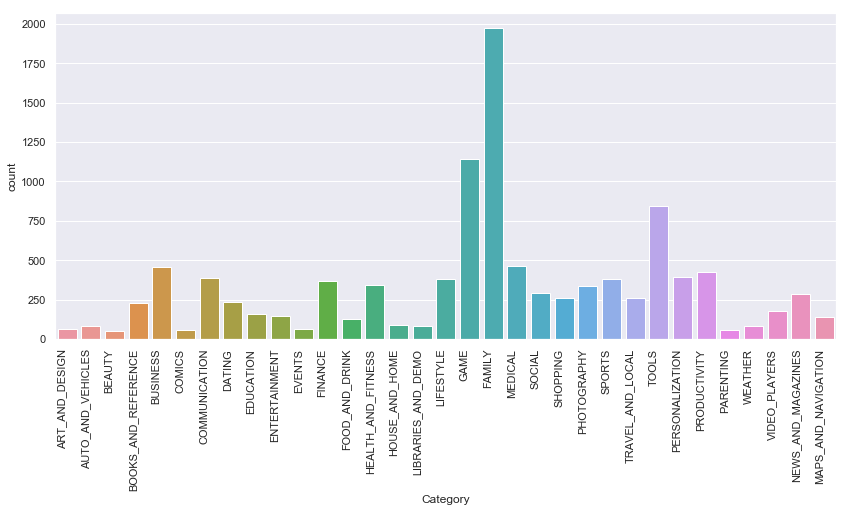

In [50]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x='Category', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

### Wniosek: największa ilość aplikacji są w kategoriach Game i Family

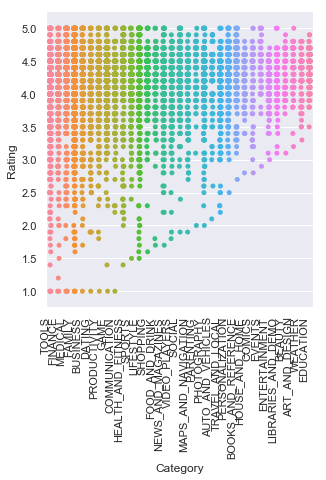

In [51]:
categories_sorted = df.sort_values(by='Rating')
categories_sorted.reset_index(inplace=True)
g = sns.catplot(x='Category', y='Rating', data=categories_sorted)
g.set_xticklabels(rotation=90, ha="right")
g

### Jak widać z wykresu, są kilka rodzajów, dla których charakterystyczne wysokie oceny. Bardzo niskie oceny też występują tylko w pewnych kategoriach. 

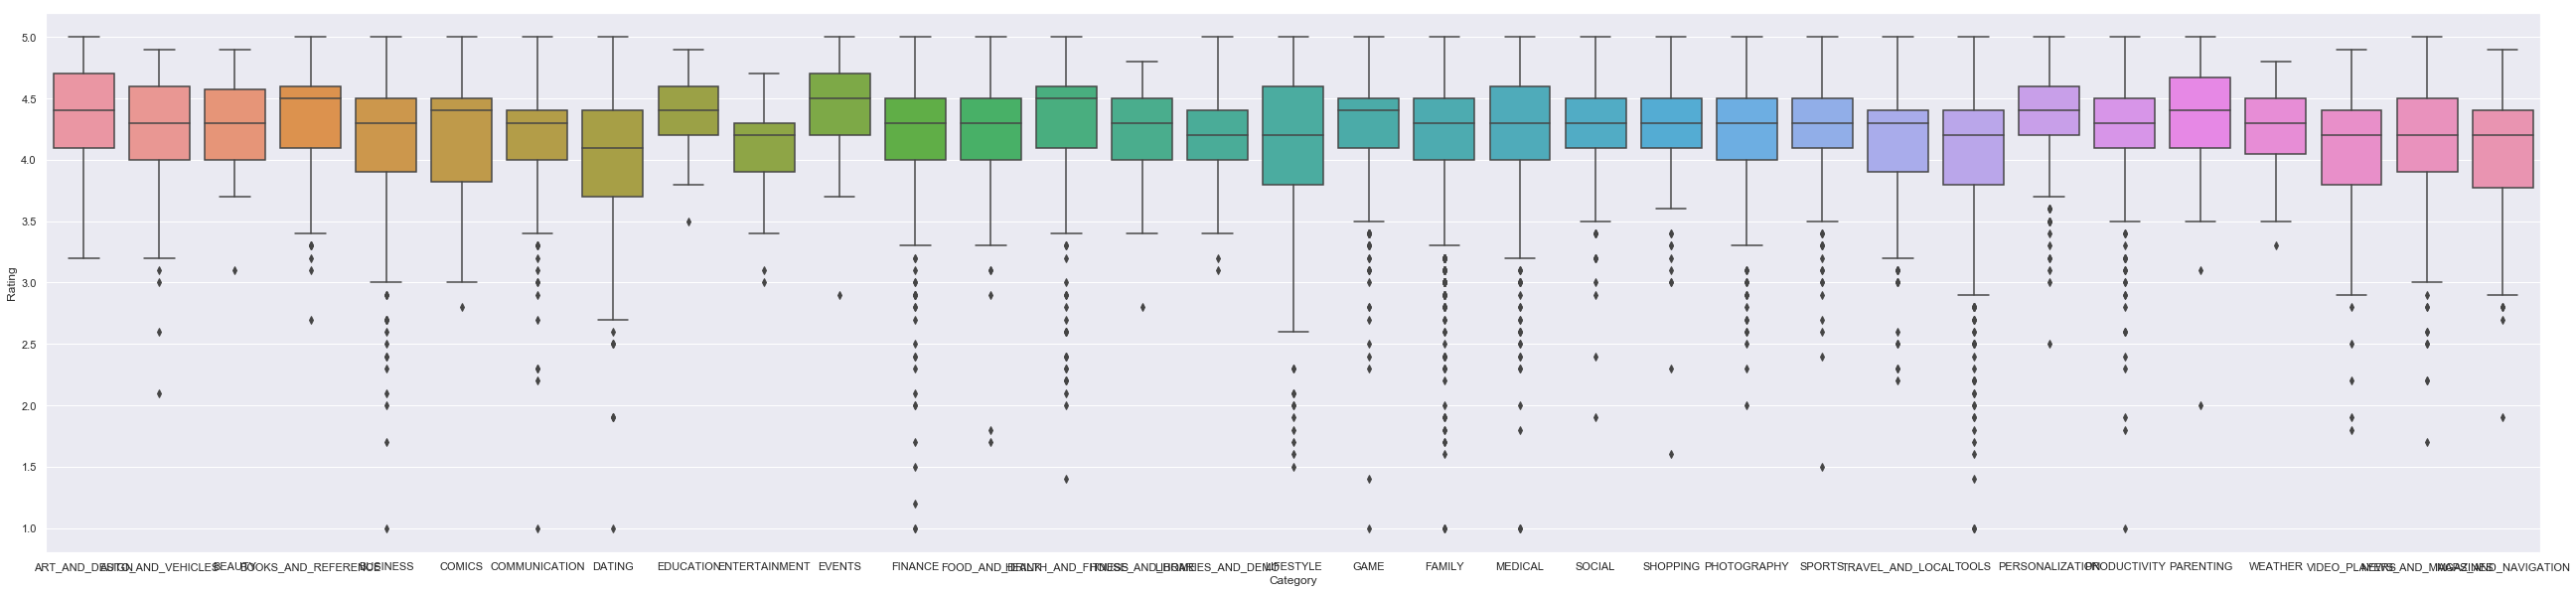

In [52]:
plt.figure(figsize=(45,10))
ax = sns.boxplot(x="Category", y="Rating", data=df)

### Boxploty pokazują nam, że z wyjątkiem kilku wartości odstających w pewnym kategoriach, dla aplikacji jest charakterystyczna wysoka ocena. 

## Gatunki

In [53]:
df['Genres'].value_counts()

Tools                                  842
Entertainment                          623
Education                              549
Medical                                463
Business                               460
Productivity                           424
Sports                                 398
Personalization                        392
Communication                          387
Lifestyle                              381
Finance                                366
Action                                 365
Health & Fitness                       341
Photography                            335
Social                                 295
News & Magazines                       283
Shopping                               260
Travel & Local                         257
Dating                                 234
Books & Reference                      231
Arcade                                 220
Simulation                             200
Casual                                 193
Video Playe

### Gatunki mają za dużo wartości unikatowych dla dobrej wizualizacji, więc na razie nie możemy stwierdzić, jaki wpływ oni mają na inne cechy. 

#  Wnioski dotyczące przygotowania danych:
- Mamy 9367 niepustych obiektów w interesującej nas kolumnie **Rating**, wartości docelowo powinny wahać się w przedziale 1.0 -5.0, ale znajduje się jedna wartość 19.0. Z analizy kwantyli wynika, że ponad **75%** wszystkich istniejących **Ratingów** ma wartość **równą bądź wyższą 4.0**, bezpiecznym jest zatem stwierdzenie, że możemy zastąpić brakujące wartości wartością równą medianie ( 4.30 ).

- Kolumna **Type** zawiera jedynie informację czy aplikacja jest płatna, czy darmowa - można zastąpić binarną reprezentacją. Płatnych aplikacji jest znacznie mniej niż bezpłatnych.

- Wszystkie rekordy mają wartość w kolumnie **Price**, jest to jednak obecnie napis - zawiera symbol dolara plus wartość liczbową, znajduje się także etykieta Everyone. Wszystkie wartości możemy zastąpić zwykłą wartością liczbową pozbywając się symbolu waluty, a wartość Everyone zastąpić zerem.

- Kolumna **Installs** zawiera wartości kategoryczne, nie ciągłe - może zostać zastąpiona wartościami liczbowymi bez większego enkodowania bo jest kategoryczna porządkowa.

- Kolumnę **AndroidVer** bezpieczniej jest enkodować. Są w niej kilka kategorii, które mają wpływ na wynikową ocenę.

- Kolumnę **Genres** też enkodujemy

- Kolumna **Size** zawiera wartości ciągle, ale z symbolami typu "M", "kb", więc przekształcamy ich na normalne wartości.


- Kolumny **Last Update**, **Current Ver** liczymy za zbyt subiektywne, więc nie uwzględniamy w analizie. 

## Przygotowanie danych

In [54]:
import re
import sys

import time
import datetime

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


In [55]:
playstore_df = pd.read_csv("./dane/googleplaystore.csv")

In [56]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Stworzenie osobnej tablicy z danymi, nie posiadającymi rating

In [57]:
without_rating = df[df['Rating'].isnull()]
without_rating.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up


### Zastąpienie niepasujących wartości Ratings medianą

In [58]:
playstore_df['Rating'] = playstore_df['Rating'].fillna(playstore_df['Rating'].median())

### Wyrzucenie anomalii z Category oraz zmiana wartości None w pozostałuch kolumnach

In [59]:
i = playstore_df[playstore_df['Category'] == '1.9'].index
playstore_df.loc[i]
playstore_df = playstore_df.drop(i)
playstore_df = playstore_df[pd.notnull(playstore_df['Last Updated'])]
playstore_df = playstore_df[pd.notnull(playstore_df['Content Rating'])]
playstore_df = playstore_df[pd.notnull(playstore_df['Android Ver'])]

### Encodowanie Category

In [60]:
category_list = playstore_df['Category'].unique().tolist() 
category_list = ['cat_' + word for word in category_list]
playstore_df = pd.concat([playstore_df, pd.get_dummies(playstore_df['Category'], prefix='cat')], axis=1)

### Encodowanie Genres

In [61]:
le = LabelEncoder()
playstore_df['Genres'] = le.fit_transform(playstore_df['Genres'])

### Encodowanie Android Ver

In [62]:
le = LabelEncoder()
playstore_df['Android Ver'] = le.fit_transform(playstore_df['Android Ver'])

### Encodowanie Content Rating: 0 - Adults Only, 1 - Everyone, 2 - Everyone 10+, 3 - Mature 17+, 4 - Teen, 5 - Unrated

In [63]:
le = LabelEncoder()
playstore_df['Content Rating'] = le.fit_transform(playstore_df['Content Rating'])

### Zmiana Price

In [64]:
playstore_df['Price'] = playstore_df['Price'].apply(lambda x : x.strip('$'))

### Zmiana Installs

In [65]:
playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

### Encodowanie Type: 1 - Bezpłatna, 0 - Płatna

In [66]:
playstore_df['Type'] = pd.get_dummies(playstore_df['Type'])

### Zmiana size, przekształcenie kb na mb

In [67]:
k_indices = playstore_df['Size'].loc[playstore_df['Size'].str.contains('k')].index.tolist()
converter = pd.DataFrame(playstore_df.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
playstore_df.loc[k_indices,'Size'] = converter
playstore_df['Size'] = playstore_df['Size'].apply(lambda x: x.strip('M'))

playstore_df.loc[(playstore_df.Size == 'Varies with device'), 'Size'] = np.nan

playstore_df['Size'] = playstore_df['Size'].astype(float)
playstore_df['Size'] = playstore_df['Size'].fillna((playstore_df['Size'].mean()))

### Wyniki

In [68]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,1,0,1,9,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,1,0,1,12,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,1,0,1,9,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,1,0,4,9,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,1,0,1,11,...,0,0,0,0,0,0,0,0,0,0


In [69]:
playstore_df.describe()

,Rating,Size,Type,Content Rating,Genres,Android Ver,cat_ART_AND_DESIGN,cat_AUTO_AND_VEHICLES,cat_BEAUTY,cat_BOOKS_AND_REFERENCE,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
count,10838.000000,10838.000000,10838.000000,10838.000000,10838.000000,10838.000000,10838.000000,10838.000000,10838.000000,10838.000000,...,10838.000000,10838.000000,10838.000000,10838.000000,10838.000000,10838.000000,10838.000000,10838.000000,10838.000000,10838.000000
mean,4.206431,21.519439,0.926186,1.465123,64.261211,17.492803,0.005997,0.007843,0.004890,0.021314,...,0.035984,0.030910,0.039122,0.023990,0.027219,0.035431,0.077782,0.023805,0.016147,0.007566
std,0.480374,20.748634,0.261481,1.006224,32.649036,7.211416,0.077214,0.088216,0.069762,0.144435,...,0.186260,0.173081,0.193893,0.153024,0.162729,0.184875,0.267840,0.152449,0.126046,0.086657
min,1.000000,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.100000,5.900000,1.000000,1.000000,38.000000,13.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.300000,18.000000,1.000000,1.000000,67.000000,17.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.500000,26.000000,1.000000,1.000000,96.000000,20.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,100.000000,1.000000,5.000000,118.000000,32.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
playstore_df.isnull().sum()

App                        0
Category                   0
Rating                     0
Reviews                    0
Size                       0
Installs                   0
Type                       0
Price                      0
Content Rating             0
Genres                     0
Last Updated               0
Current Ver                8
Android Ver                0
cat_ART_AND_DESIGN         0
cat_AUTO_AND_VEHICLES      0
cat_BEAUTY                 0
cat_BOOKS_AND_REFERENCE    0
cat_BUSINESS               0
cat_COMICS                 0
cat_COMMUNICATION          0
cat_DATING                 0
cat_EDUCATION              0
cat_ENTERTAINMENT          0
cat_EVENTS                 0
cat_FAMILY                 0
cat_FINANCE                0
cat_FOOD_AND_DRINK         0
cat_GAME                   0
cat_HEALTH_AND_FITNESS     0
cat_HOUSE_AND_HOME         0
cat_LIBRARIES_AND_DEMO     0
cat_LIFESTYLE              0
cat_MAPS_AND_NAVIGATION    0
cat_MEDICAL                0
cat_NEWS_AND_M

## Analiza danych przekształconych

### Badanie wyczyszczonego Size

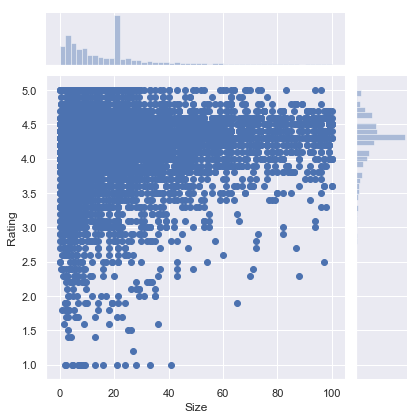

In [71]:
sns.jointplot(x='Size', y='Rating', data=playstore_df)

In [72]:
heavy = playstore_df[playstore_df['Size'] > 95]

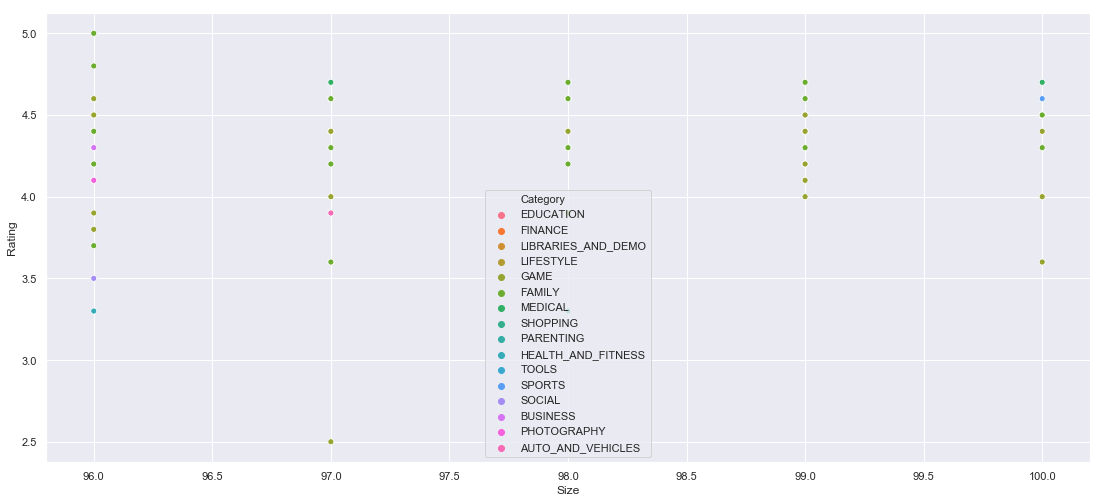

In [73]:
sns.scatterplot(x=heavy['Size'], y=heavy['Rating'], hue=heavy['Category'])

### Wniosek: większość najlepiej ocenianych aplikacji zajmuje mniej 30 MB pamięci. Bardzo duże aplikację ogólnie mają dobre oceny. "Ciężkie" aplikacje zwykle przedstawiają sobą aplikajce typu "Games" oraz "Family"

### Standaryzacja

In [74]:
playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'cat_ART_AND_DESIGN', 'cat_AUTO_AND_VEHICLES',
       'cat_BEAUTY', 'cat_BOOKS_AND_REFERENCE', 'cat_BUSINESS', 'cat_COMICS',
       'cat_COMMUNICATION', 'cat_DATING', 'cat_EDUCATION', 'cat_ENTERTAINMENT',
       'cat_EVENTS', 'cat_FAMILY', 'cat_FINANCE', 'cat_FOOD_AND_DRINK',
       'cat_GAME', 'cat_HEALTH_AND_FITNESS', 'cat_HOUSE_AND_HOME',
       'cat_LIBRARIES_AND_DEMO', 'cat_LIFESTYLE', 'cat_MAPS_AND_NAVIGATION',
       'cat_MEDICAL', 'cat_NEWS_AND_MAGAZINES', 'cat_PARENTING',
       'cat_PERSONALIZATION', 'cat_PHOTOGRAPHY', 'cat_PRODUCTIVITY',
       'cat_SHOPPING', 'cat_SOCIAL', 'cat_SPORTS', 'cat_TOOLS',
       'cat_TRAVEL_AND_LOCAL', 'cat_VIDEO_PLAYERS', 'cat_WEATHER'],
      dtype='object')

In [75]:
features = ['Reviews', 'Size', 'Installs', 'Price', 'Rating' ]
min_max_scaler = MinMaxScaler()
column_names_to_normalize = features
stand_df = playstore_df.copy()
x = stand_df[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = stand_df.index)
stand_df[column_names_to_normalize] = df_temp

C:\Users\strai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [76]:
stand_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,0.775,0.000002,0.189935,0.00001,1,0.0,1,9,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,0.725,0.000012,0.139931,0.00050,1,0.0,1,12,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,0.925,0.001120,0.086927,0.00500,1,0.0,1,9,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,0.875,0.002759,0.249940,0.05000,1,0.0,4,9,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,0.825,0.000012,0.027922,0.00010,1,0.0,1,11,...,0,0,0,0,0,0,0,0,0,0


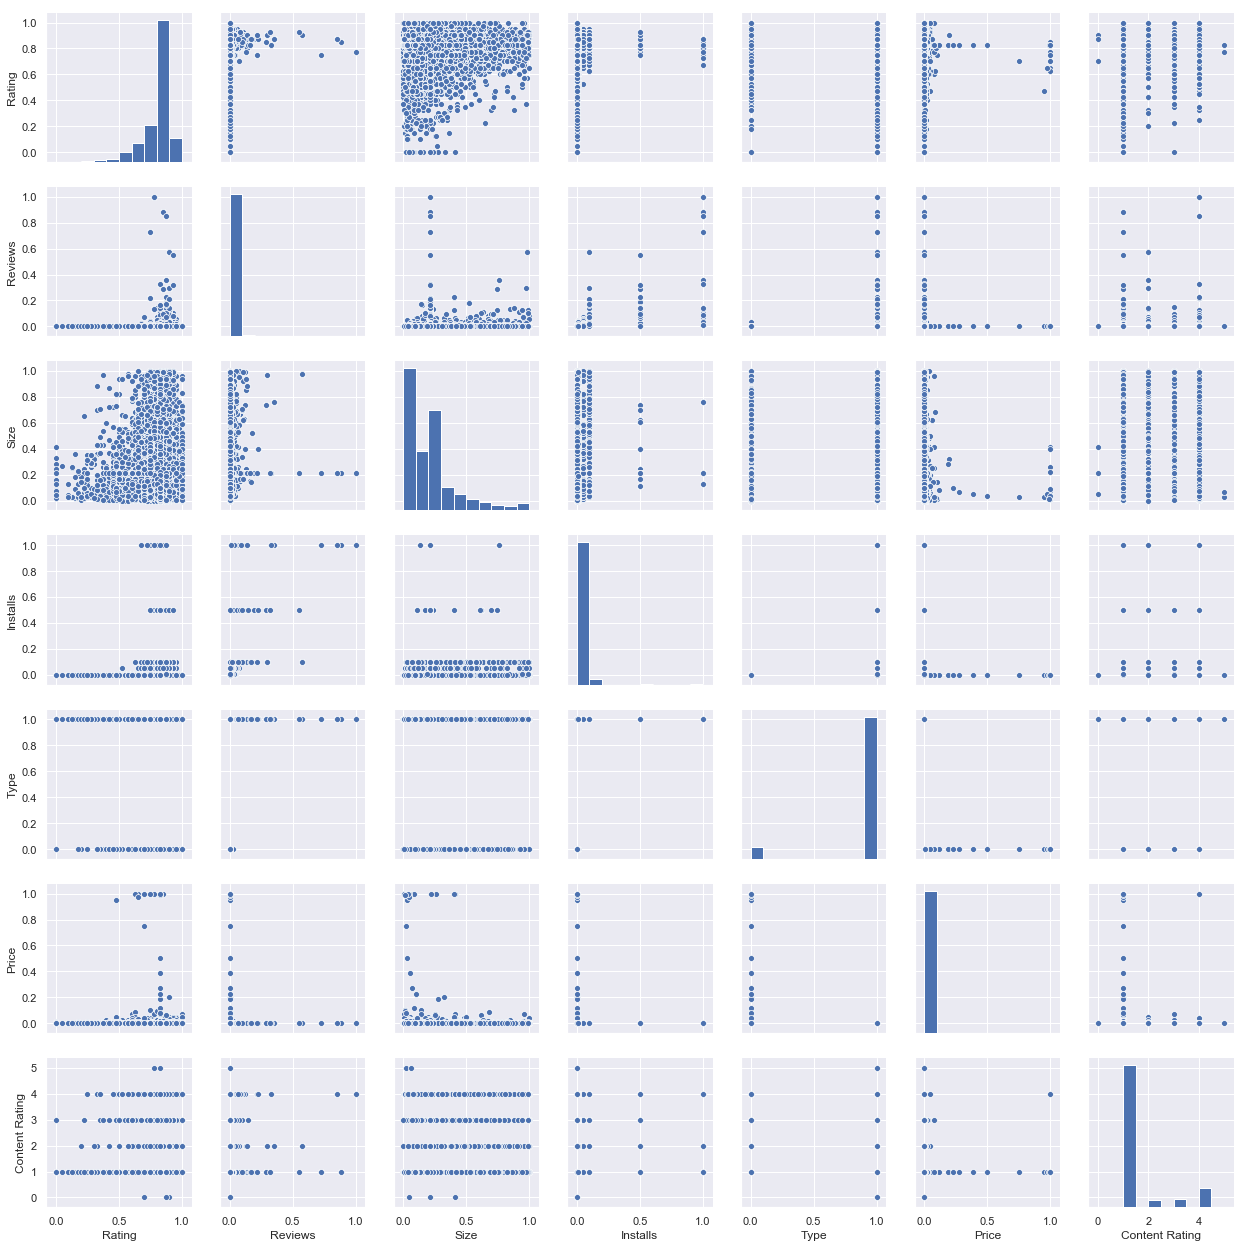

In [77]:
columns = ['Rating','Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Last Updated']
sns.pairplot(stand_df[columns])

### Wnioski: 
- drogie aplikacje zajmują mało miejsca.
- aplikacje typu Adults Only, Unrated są rzadko instalowane + tylko bezpłatne.
- aplikacje typu Everyone, Tenn są najdroższe.

- aplikacje o niskiej ocenie mają małą ilość opinii.
- największą liczbę opinii mają aplikacje, które są najczęściej instalowane.
- największą liczbę opinii mają aplikacje o średnim rozmiarze.
- płatne aplikacje są rzadko komentowane oraz instalowane, niezależnie od ceny.
- aplikacje typu Adults Only, Unrated są rzadko komentowane.


### Jak są powiązane Wersji Androida oraz Ilość opinii

In [78]:
rev_cat = stand_df.groupby('Category').mean()
rev_cat = rev_cat.sort_values(by='Reviews')

<Figure size 3240x720 with 0 Axes>

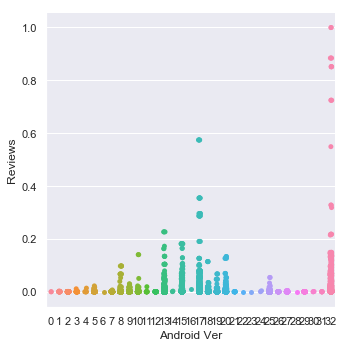

In [79]:
plt.figure(figsize=(45,10))
sns.catplot(x='Android Ver', y = 'Reviews', data=stand_df)

### Wniosek: duża ilość opinii charakterystyczna dla aplikacji, które są dostępne dla pewnych wersji androida. 

### Jak są powiązane Kategorie oraz Ilość opinii

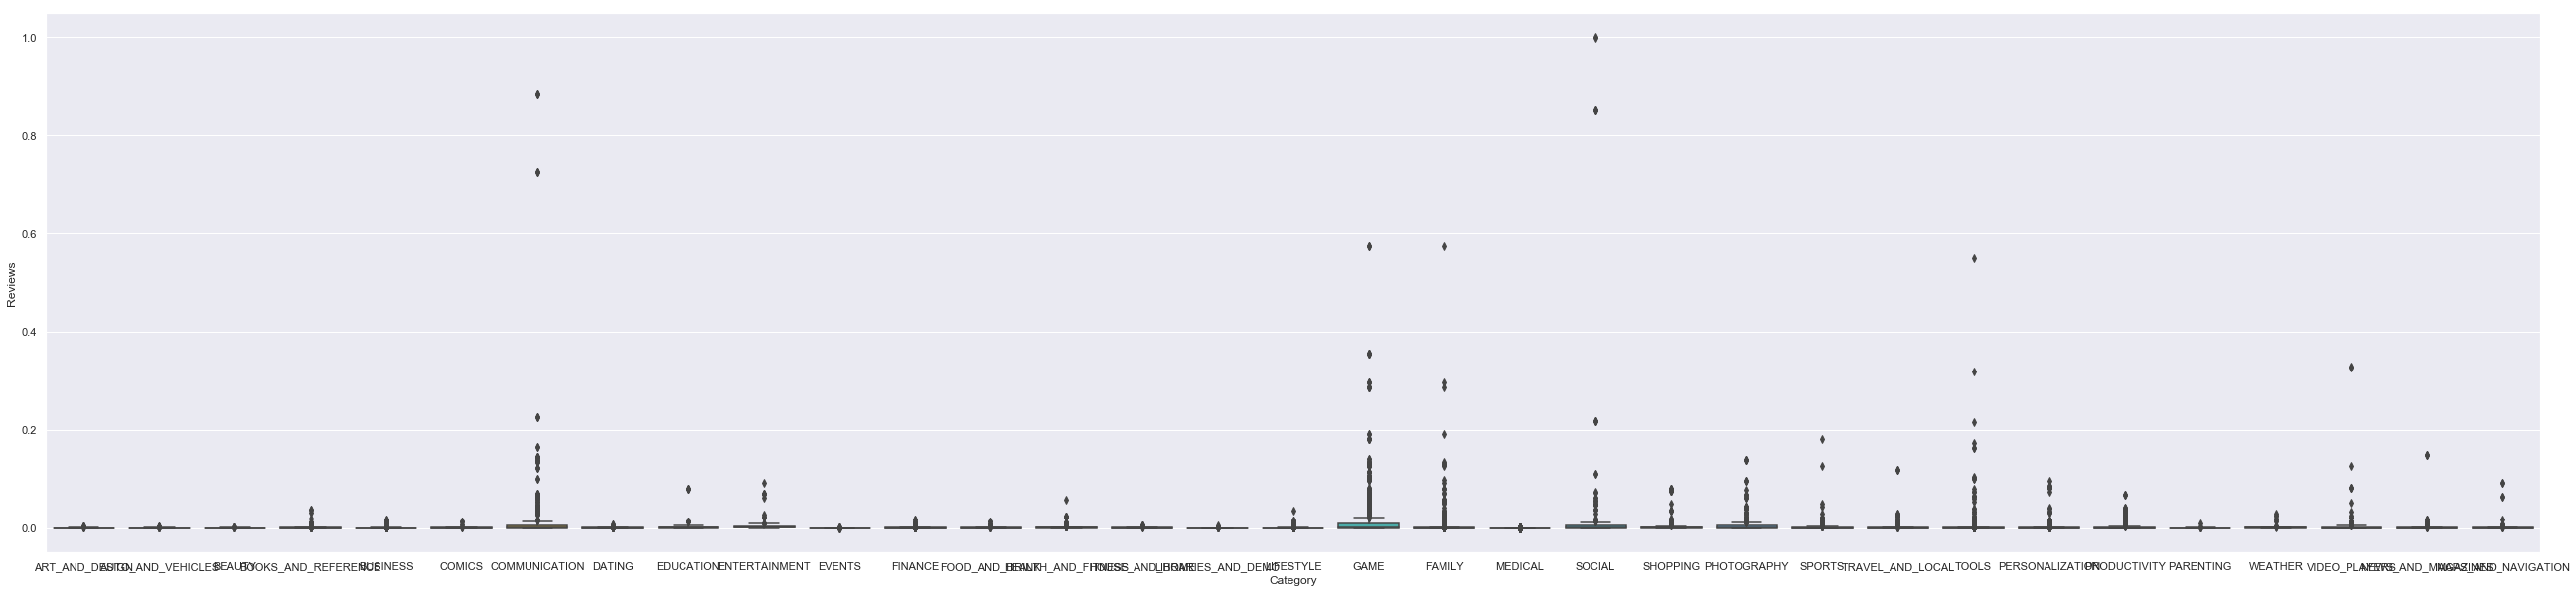

In [80]:
plt.figure(figsize=(45,10))
ax = sns.boxplot(x="Category", y="Reviews", data=stand_df)

### Jak widać z boxplota, kilka zakresów Reviews charakterystyczne tylko dla pewnych kategorii. 

## Badanie korelacji

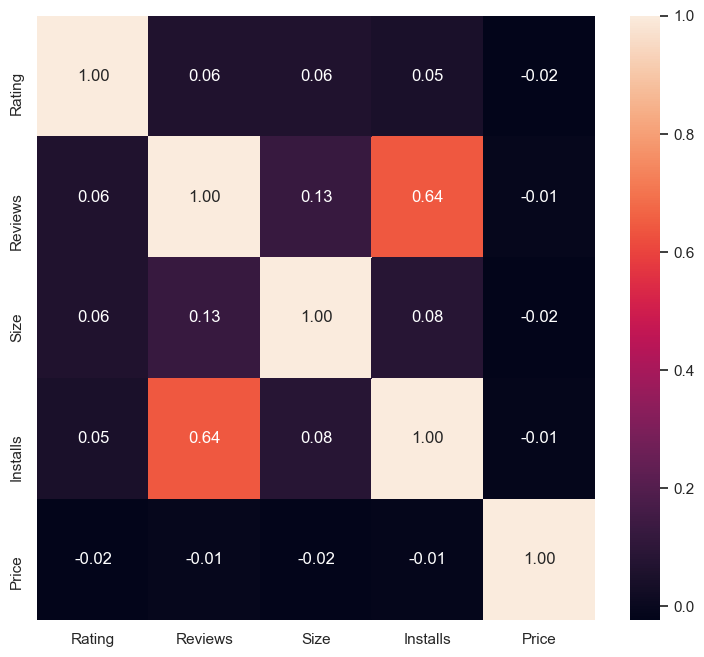

In [81]:
heat_atr=['Rating', 'Reviews', 'Size', 'Installs', 'Price']
plt.figure(figsize=(9,8), dpi = 100)
sns.heatmap(stand_df[heat_atr].corr(), annot=True, fmt='.2f')

### Wniosek: są mocne skorelowane liczby instalacji i opinii. To wynika z tego, że użytkownik zostawia opinię dopiero po pobraniu aplikacji. Trochę są skorelowane Opinie i Rozmiar. 

In [82]:
features = ['Android Ver', 'Genres', 'Content Rating' ]
min_max_scaler = MinMaxScaler()
column_names_to_normalize = features
x = stand_df[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = stand_df.index)
stand_df[column_names_to_normalize] = df_temp

C:\Users\strai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### Podsumowanie:
Po analizie zbioru danych udało się znaleźć dużo zależności pomiędzy różnymi cechami. Ogólne patrzyliśmy na cechy Rating oraz Reviews i ich zależności od innych. Są kilka parametrów, które mają wpływ na wysoką ocenę aplikacji, jednak nie udało się znaleźć dużo warunków, przy których aplikacja byłaby nisko oceniania. Trochę lepiej jest sytuacja z Reviews — udało się znaleźć warunki, przy których aplikacja ma dużo opinii, oraz przy których ma mało. Z tego powodu wybieramy tę cechę dla badania regresji.

# Teza

**Teza**: Istnieje model regresji Liczby opinii bazujący na cechach dostępnych w opracowywanym zbiorze danych.

**Założenia**: Macierz korelacji pokazuje nam, że Reviews koreluje z cechą Installs. Największą ilość opinii mają aplikacje o średnim rozmiarze, wysokiej ocenie. Płatne aplikacje są rzadko komentowane, niezależnie od ceny. Małą liczbę opinii mają aplikacje typu Adults Only oraz Unrated. Obsługa pewnych wersji androidu ma wpływ na liczbę opinii. Niektóre zakresy dla Reviews są charakterystyczne tylko dla pewnych kategorii.

**Wybor modelu**: Po wstępnej analizie danych nie udało się znaleźć dobrych liniowych zależności pomiędzy cechami. Kolumna Price, mimo tego, że posiada wartości ciągle, jest trochę kategoryczna - dla bezpłatnych aplikacji cena jest równa 0. Niektóre kategorie mogą wyznaczyć nam zakres wartości Reviews. W różnych cechach są kilka wartości odstających. Podsumowując to, zakładamy, że liniowa regresja nie będzie dla nas skuteczna, i najlepiej będzie wykorzystać las drzew decyzyjnych. 

# Model

In [83]:
features = ['Installs', 'Rating', 'Size', 'Type', 'Price', 'Content Rating', 'Genres', 'Android Ver']
features.extend(category_list)

In [84]:
X = stand_df[features]
y = stand_df['Reviews']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

## Regularyzacja oraz dobór cech

### Sprawdzamy Lasso

In [85]:
from sklearn.linear_model import Lasso # using scikit-learn

In [86]:
lambdas = [0.001, 0.0001, 0.1, 0.4, 1, 2, 0.00001, 0.000001]
params = [
    {'alpha' : lambdas},
]

model = Lasso()
grid_search = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error',
                          return_train_score=True, cv=5)
grid_search.fit(X=X_train, y=y_train)
print(grid_search.best_estimator_)


Lasso(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [87]:
model_all = Lasso(alpha=0.000001, normalize=True) # set parameters
model_all.fit(X_train, y_train) # learn weights
model_all.coef_

array([ 2.56047090e-01,  7.65988771e-03,  1.10587992e-02,  1.13677014e-03,
        0.00000000e+00,  0.00000000e+00,  4.40459142e-03,  0.00000000e+00,
        4.39189521e-04,  2.67360422e-04,  0.00000000e+00,  0.00000000e+00,
        6.89393041e-04,  1.96746207e-04,  3.50438325e-03,  2.87021365e-04,
        4.87796757e-04, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -5.05334634e-04, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  7.82232770e-03,  3.60248930e-05, -4.45854264e-04,
        1.06368348e-02,  4.05364357e-04, -3.77206156e-04, -1.14960503e-03,
       -6.21876070e-03, -4.19089750e-04,  7.43676129e-04, -6.53529903e-03,
       -5.01101020e-04, -1.03277256e-04, -3.42066100e-03, -4.73176942e-03,
        5.94844090e-04])

In [88]:
model_all.score(X_test, y_test)

0.49881950725437163

In [89]:
chosen = {}
for param, coef in zip(features, model_all.coef_):
    if coef > 0:
        chosen[param] = coef
features_use = sorted(chosen.items(), key=lambda x: x[1], reverse=True)
features_use

[('Installs', 0.25604709023844857),
 ('Size', 0.011058799188546917),
 ('cat_SOCIAL', 0.010636834755899358),
 ('cat_GAME', 0.007822327703784987),
 ('Rating', 0.007659887713089188),
 ('Genres', 0.004404591418746623),
 ('cat_COMMUNICATION', 0.0035043832542237204),
 ('Type', 0.0011367701376822402),
 ('cat_PERSONALIZATION', 0.0007436761290249863),
 ('cat_BUSINESS', 0.0006893930413375127),
 ('cat_MAPS_AND_NAVIGATION', 0.0005948440901532866),
 ('cat_EDUCATION', 0.00048779675745279014),
 ('cat_ART_AND_DESIGN', 0.00043918952144991253),
 ('cat_SHOPPING', 0.00040536435727418535),
 ('cat_DATING', 0.00028702136507330225),
 ('cat_AUTO_AND_VEHICLES', 0.00026736042169958044),
 ('cat_COMICS', 0.00019674620665180404),
 ('cat_FAMILY', 3.602489303277712e-05)]

Text(0, 0.5, 'Wartości testowe')

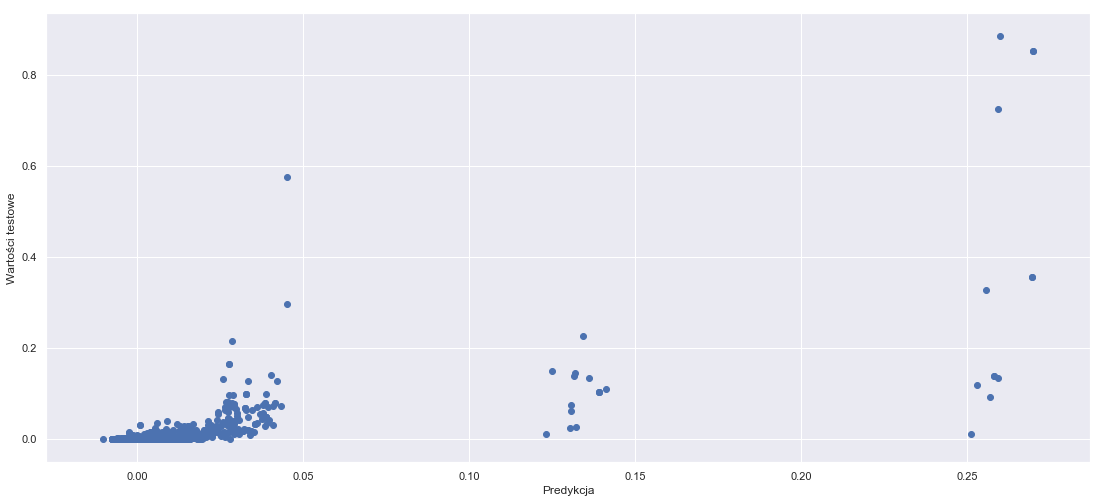

In [90]:
y_pred = model_all.predict(X_test)
plt.scatter(x=y_pred,  y=y_test)
plt.xlabel('Predykcja')
plt.ylabel('Wartości testowe')

### Sprawdzamy Ridge

In [91]:
from sklearn.linear_model import Ridge
lambdas = [0.001, 0.0001, 0.1, 0.4]
params = [
    {'alpha' : lambdas},
]

model = Ridge()
grid_search = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error',
                          return_train_score=True, cv=5)
grid_search.fit(X=X_train, y=y_train)
print(grid_search.best_estimator_)

ridge = Ridge(alpha=0.4)
ridge.fit(X_train, y_train)
train_score=ridge.score(X_train,y_train)
test_score=ridge.score(X_test,y_test)
print("training score:", train_score) 
print("test score: ", test_score)
cechy = {}
for feature, coef in zip(list(X.columns), ridge.coef_):
        #print(f'Cecha: {feature},      Współczynnik: {coef}')
    cechy[feature] = coef
    
features_use = sorted(cechy.items(), key=lambda x: x[1], reverse=True)
features_use

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
training score: 0.3995844670810033
test score:  0.4984648347160024


[('Installs', 0.25499376371385546),
 ('Size', 0.0109725169235652),
 ('cat_SOCIAL', 0.009896897486691448),
 ('cat_GAME', 0.00925845327655371),
 ('Genres', 0.008351550285973256),
 ('Rating', 0.008181049243916086),
 ('cat_COMMUNICATION', 0.004874065801721213),
 ('cat_ART_AND_DESIGN', 0.0032752228184759254),
 ('cat_BEAUTY', 0.00290368324584705),
 ('cat_AUTO_AND_VEHICLES', 0.0028360248968022695),
 ('Price', 0.002619006480206278),
 ('cat_BUSINESS', 0.002418693614607049),
 ('cat_COMICS', 0.0022920100081402764),
 ('cat_EDUCATION', 0.0018992576251727947),
 ('cat_DATING', 0.0017824485103382114),
 ('Type', 0.0015077156016504167),
 ('cat_BOOKS_AND_REFERENCE', 0.0015031399413855224),
 ('cat_MAPS_AND_NAVIGATION', 0.0010686052948125108),
 ('Android Ver', 0.0006807147034690325),
 ('cat_PERSONALIZATION', 0.0006750335920252516),
 ('cat_FAMILY', 0.0004795249811809688),
 ('cat_SHOPPING', -0.00022416275508486573),
 ('cat_LIBRARIES_AND_DEMO', -0.0002840902011463855),
 ('Content Rating', -0.00031445451758871

Text(0, 0.5, 'Wartości testowe')

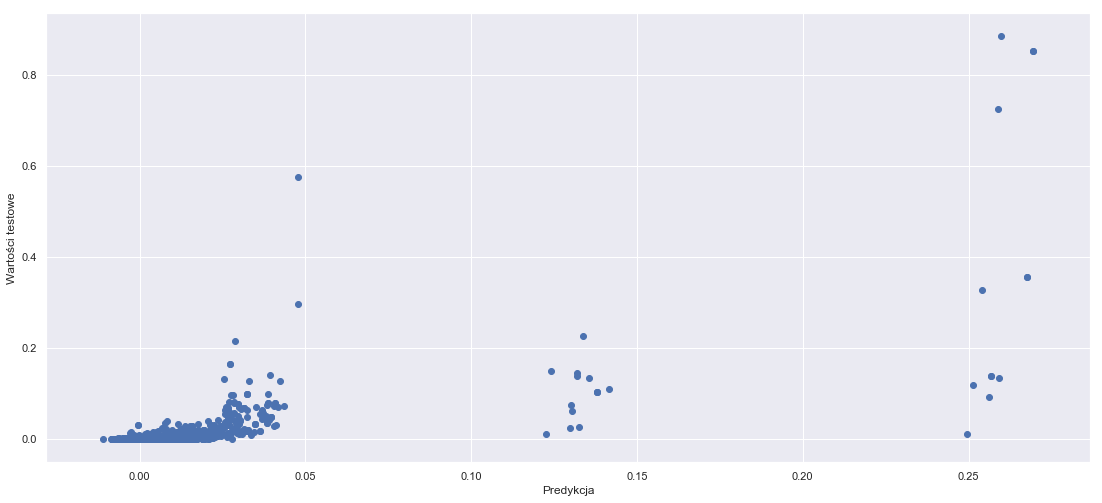

In [92]:
y_pred = ridge.predict(X_test)
plt.scatter(x=y_pred,  y=y_test)
plt.xlabel('Predykcja')
plt.ylabel('Wartości testowe')

### Przejrzymy się dokładnej wynikom 

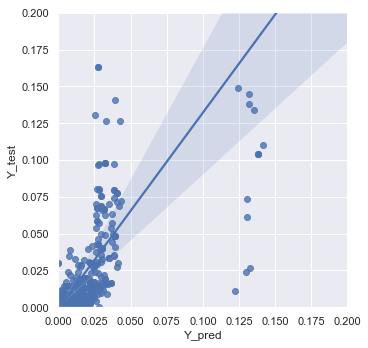

In [93]:
data = pd.DataFrame({'Y_pred' : list(y_pred), 'Y_test' : list(y_test)})
g = sns.lmplot(x='Y_pred', y='Y_test', data=data)
g = g.set(xlim=(0,0.2),ylim=(0,0.2))

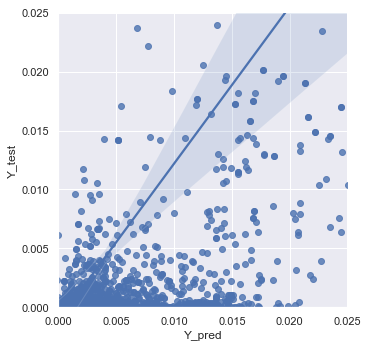

In [94]:
g = sns.lmplot(x='Y_pred', y='Y_test', data=data)
g = g.set(xlim=(0,0.025),ylim=(0,0.025))

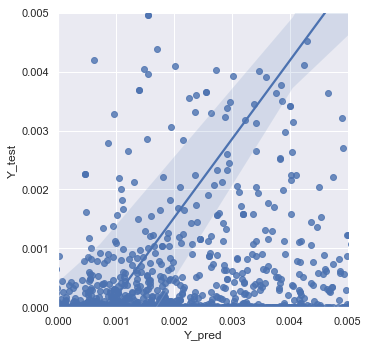

In [95]:
g = sns.lmplot(x='Y_pred', y='Y_test', data=data)
g = g.set(xlim=(0,0.005),ylim=(0,0.005))

### Wniosek: Cechy, dobrane przez Ridge oraz Lasso nie bardzo się różnią: Najlepiej model opisują Installs oraz Size, które są skorelowane z wyjściem. Score dla Ridge oraz Lasso oznacza współczynnik determinacji R^2 i im większy ten współczynnik jest, tym lepiej model jest dopasowany do danych: jak widać, regularyzacja liniowa nie jest skuteczna pod tym względem. Dobór lambdy nie ma dużego wpływu, więc problem nie jest w wariancji, wyjście jest mało skorelowane z cechami.

### Sprawdzamy cechy, dobrane przez Drzewo decyzyjne

### Sklearn w drzewach decyzyjnych wykorzystuje algorytm CART, dla obliczenia feature_importances wykorzystuje współczynnik Giniego.

In [116]:
from sklearn.tree import DecisionTreeRegressor
#criterion “mae” for the mean absolute error, which minimizes the L1 loss using the median of each terminal node.
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [117]:
best_features = {}
for wsp, feat in zip(model.feature_importances_, features):
    best_features[feat] = wsp
features_use = sorted(best_features.items(), key=lambda x: x[1], reverse=True)
features_use

[('Installs', 0.464634186242156),
 ('Rating', 0.23558576604121087),
 ('cat_SOCIAL', 0.07816333335953664),
 ('Android Ver', 0.07774482287111986),
 ('Size', 0.0728632390921217),
 ('Genres', 0.055106493513320996),
 ('Content Rating', 0.008282293335533757),
 ('cat_PHOTOGRAPHY', 0.0037030454032933526),
 ('cat_COMMUNICATION', 0.0011351611338654693),
 ('cat_BOOKS_AND_REFERENCE', 0.0009409226734425925),
 ('cat_MAPS_AND_NAVIGATION', 0.0004469058796824447),
 ('cat_TOOLS', 0.00038056572232475575),
 ('cat_GAME', 0.00034659508048810966),
 ('cat_SHOPPING', 0.0002051825653640195),
 ('cat_PRODUCTIVITY', 0.00011423671091901781),
 ('cat_SPORTS', 9.337312794217312e-05),
 ('cat_FAMILY', 6.39178449410412e-05),
 ('cat_ENTERTAINMENT', 2.522781214449361e-05),
 ('cat_VIDEO_PLAYERS', 2.360992151648555e-05),
 ('cat_TRAVEL_AND_LOCAL', 2.189029465948908e-05),
 ('cat_NEWS_AND_MAGAZINES', 1.5899098774135485e-05),
 ('cat_PERSONALIZATION', 1.565954212528113e-05),
 ('cat_FOOD_AND_DRINK', 1.5186161094623621e-05),
 ('cat

## Zwykle drzewo decyzyjne za najlepsze cechy uważa Installs, Size, Rating, Genres, Content Rating, Android Ver. 

sort_feat, values = zip(*features_use)
new_features = list(sort_feat[:4])
new_features

## Zachłanny dobór cech

In [98]:
def najlepsze_cechy2(n):
    reg = DecisionTreeRegressor()
    prev = []
    cechy = features.copy()
    for i in range(n):    
        cechy_testowe = {}
        best = {}    
        for i, value in enumerate(cechy):
            tmp = prev + [value]
            blad = cross_val_score(reg, X_train[tmp], y_train, cv=5, scoring="neg_mean_squared_error")
            rmse_cv_error = np.sqrt(sum(blad * -1) / 5)
            cechy_testowe[rmse_cv_error] = value
            
        if cechy_testowe:
            lowest_error = sorted(cechy_testowe.keys())[0]
            prev += [cechy_testowe[lowest_error]]
            best[lowest_error] = prev
            cechy.remove(cechy_testowe[lowest_error])
        
        
    return list(best.values()), list(best.keys())


for i in range(1,8):
    print(najlepsze_cechy2(i))

([['Installs']], [0.0284351474198038])
([['Installs', 'Genres']], [0.025310141021537853])
([['Installs', 'Genres', 'Rating']], [0.014045636228702791])
([['Installs', 'Genres', 'Rating', 'Type']], [0.014028316180634728])
([['Installs', 'Genres', 'Rating', 'Size', 'cat_HEALTH_AND_FITNESS']], [0.01303234504942601])
([['Installs', 'Genres', 'Rating', 'Type', 'Size', 'cat_DATING']], [0.013022947951985648])
([['Installs', 'Genres', 'Rating', 'cat_NEWS_AND_MAGAZINES', 'cat_FINANCE', 'Price', 'Size']], [0.013112765374871492])


### Po uruchomieniu dla róznych wartości treningowych/testowych najmniejszy błąd jest charakterystyczny dla cech Installs, Genres, Rating, Size oraz Price + cecha z kategorii, która się różni w zależności od rozbicia zbioru danych na testowy/treningowy. Ogólnie dla dość małego błędu wystarczy cech Installs, Genres oraz Rating. 


In [99]:
new_features = ['Installs', 'Genres',  'Rating']

## Model regresji: Random Forest

#### Po wstępnej analizie danych było widać, że w naszym zbiorze mamy dość dużo różnych wartości odstających, więc nie zbędnym będzie wykorzystać las losowy, bo zwykłe drzewo decyzyjne może zostać przeuczone

[(10, 0.8758429191387483),
 (20, 0.9067392176152531),
 (30, 0.8961634280494883),
 (40, 0.8965722720011458),
 (50, 0.9024082212945885),
 (60, 0.9071637438014579),
 (70, 0.9002622314287967),
 (80, 0.9113689827226142),
 (90, 0.9080788549200989),
 (100, 0.9096617173212974),
 (110, 0.9044132727204724),
 (120, 0.9133964803344532),
 (130, 0.9019204348340265),
 (140, 0.9050814328469861),
 (150, 0.9008959458057116),
 (160, 0.9010478501109898),
 (170, 0.9073191681084152),
 (180, 0.9052291408491411),
 (190, 0.906569704133898)]

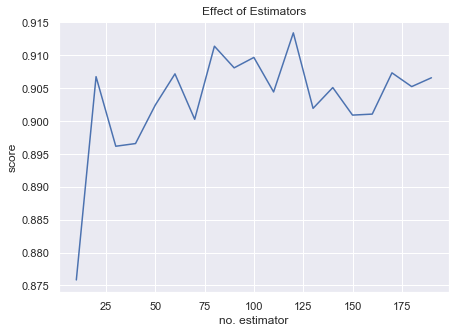

In [100]:
model = RandomForestRegressor(n_jobs=-1)
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train[new_features], y_train)
    scores.append(model.score(X_test[new_features], y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
results = list(zip(estimators,scores))
results

#### Regresja dla wybranych cech:

In [101]:
model.set_params(n_estimators=50)
model.fit(X_train[new_features], y_train)
y_pred = model.predict(X_test[new_features])

In [102]:
model.score(X_test[new_features], y_test)

0.8952754527871792

<Figure size 1584x720 with 0 Axes>

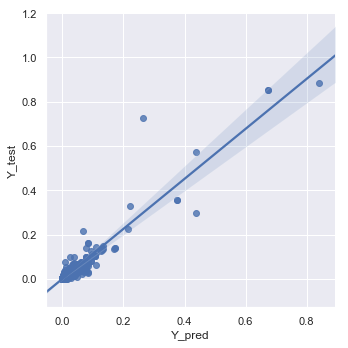

In [103]:
plt.figure(figsize=(22, 10))
data = pd.DataFrame({'Y_pred' : list(y_pred), 'Y_test' : list(y_test)})
sns.lmplot(x='Y_pred', y='Y_test', data=data)

### Tylko dla Installs

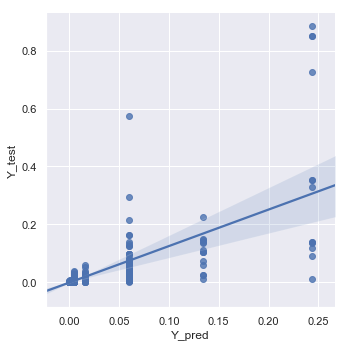

In [104]:
model.set_params(n_estimators=50)
model.fit(X_train[['Installs']], y_train)
y_pred = model.predict(X_test[['Installs']])
data = pd.DataFrame({'Y_pred' : list(y_pred), 'Y_test' : list(y_test)})
sns.lmplot(x='Y_pred', y='Y_test', data=data)

## Dla Installs, Genres

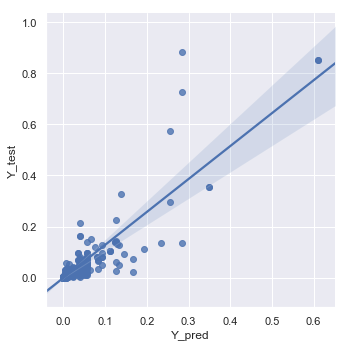

In [105]:
model.set_params(n_estimators=50)
model.fit(X_train[['Installs', 'Genres']], y_train)
y_pred = model.predict(X_test[['Installs', 'Genres']])
data = pd.DataFrame({'Y_pred' : list(y_pred), 'Y_test' : list(y_test)})
sns.lmplot(x='Y_pred', y='Y_test', data=data)

## Dla installs, Genres, Rating

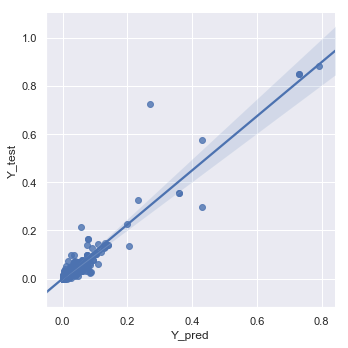

In [106]:
model.set_params(n_estimators=50)
model.fit(X_train[['Installs', 'Genres','Rating']], y_train)
y_pred = model.predict(X_test[['Installs', 'Genres','Rating']])
data = pd.DataFrame({'Y_pred' : list(y_pred), 'Y_test' : list(y_test)})
sns.lmplot(x='Y_pred', y='Y_test', data=data)

#### Regresja dla wszystkich cech:

In [107]:
model.set_params(n_estimators=125)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [108]:
model.score(X_test, y_test)

0.9276079501852784

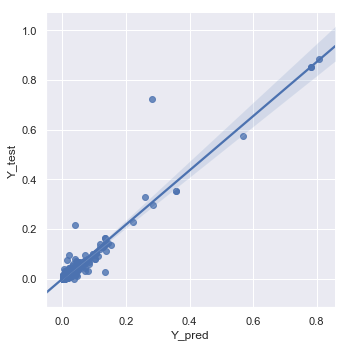

In [109]:
data = pd.DataFrame({'Y_pred' : list(y_pred), 'Y_test' : list(y_test)})
g = sns.lmplot(x='Y_pred', y='Y_test', data=data)

#### Przejrzymy się dokładniej wynikom

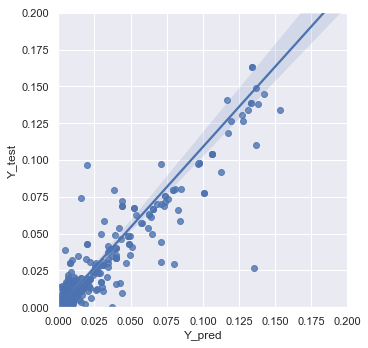

In [110]:
g = sns.lmplot(x='Y_pred', y='Y_test', data=data)
g = g.set(xlim=(0,0.2),ylim=(0,0.2))

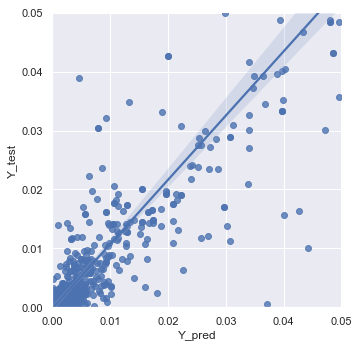

In [111]:
g = sns.lmplot(x='Y_pred', y='Y_test', data=data)
g = g.set(xlim=(0,0.050),ylim=(0,0.050))

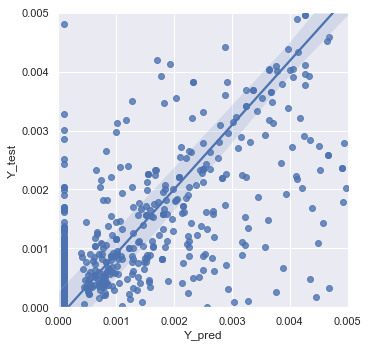

In [112]:
g = sns.lmplot(x='Y_pred', y='Y_test', data=data)
g = g.set(xlim=(0,0.005),ylim=(0,0.005))

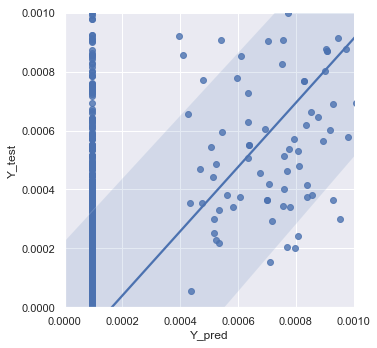

In [113]:
g = sns.lmplot(x='Y_pred', y='Y_test', data=data)
g = g.set(xlim=(0,0.001),ylim=(0,0.001))

## Wnioski końcowe:

Jak zakładaliśmy, liniowa regresja nie okazała się bardzo skuteczna, pod tym wzgłędem, że nie poradziła z wartościami dużymi. 

Najlepszymi cechami okazały się Installs, Genres, Rating, Price, Size. Installs oraz Size są skorelowane z wyjściem, Rating oraz Price mają pewnie zależności, ale ciekawe, że cecha Genres okazała się na tyle ważna, mimo tego, że zawiera dużo wartości unikatowych. Przy sprawdzeniu działania lasu dla tylko jednej cechy Installs otrzymaliśmy ten samy błąd, co dla regresji liniowej - drzewo nie radzi z wartościami dużymi. Dopiero po dodaniu cechy Genres uzyskaliśmy dopasowanie do wartości dużych.

Regresor lasu losowego daje nam dość dobry wynik. Ale, jeśli popatrzyć na otrzymane wartości, możemy zauważyć, że mały błąd może być spowodowany zakresom danych - po standaryzacji większość wartości się okazała w zakresie 0.0 - 0.2. Uwzględniając to, że największa wartość jest rzędu 7^7, a najmniejsza - 0, to błąd w 0.001 oznacza rozbieżność w wartości 10.000. Regresor ma problem z bardzo małymy wartościami do 10.000. Z drugiej strony, "Ilość opinii" jest cechą, gdzie bardziej liczy się rząd wartości, niż dokładna jej wartość. Regresor lasu losowego mniej więcej poradził z dużymi wartościami, co nie dało się osiągnąć przy regresji liniowej. Z tego powodu liczymy, że nasz regresor odpowiada naszym celom.